In [ ]:
# Run this cell first in Google Colab
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


First 5 rows of the dataset:
      CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0     15.3   
1  0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0     17.8   
2  0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0     17.8   
3  0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0     18.7   
4  0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null  

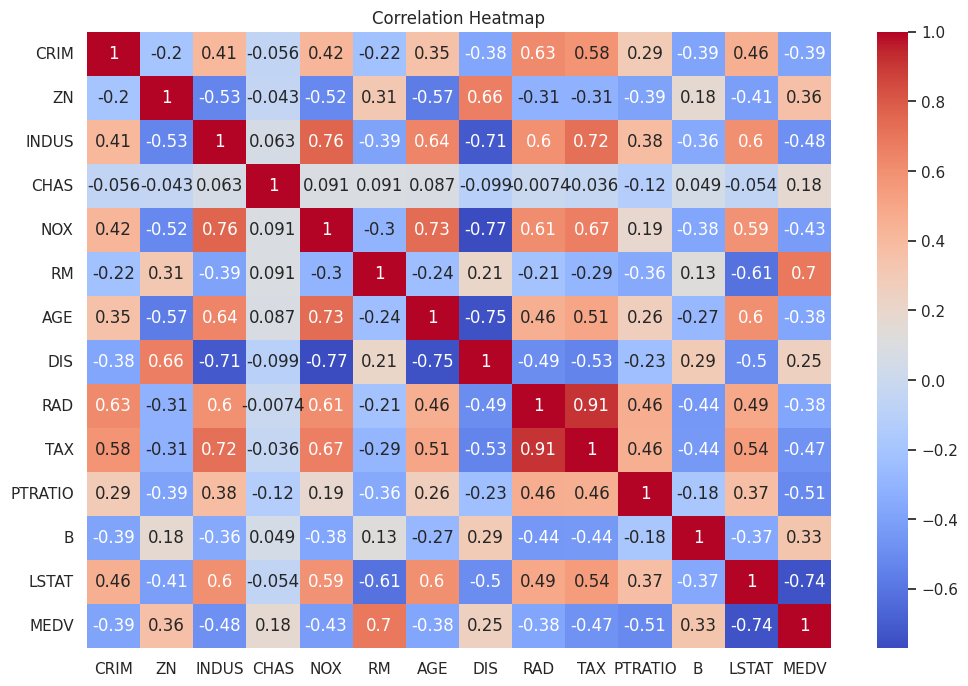


Linear Regression Performance:
R2 Score: 0.6688
RMSE: 4.9286

Random Forest Performance:
R2 Score: 0.8923
RMSE: 2.8110


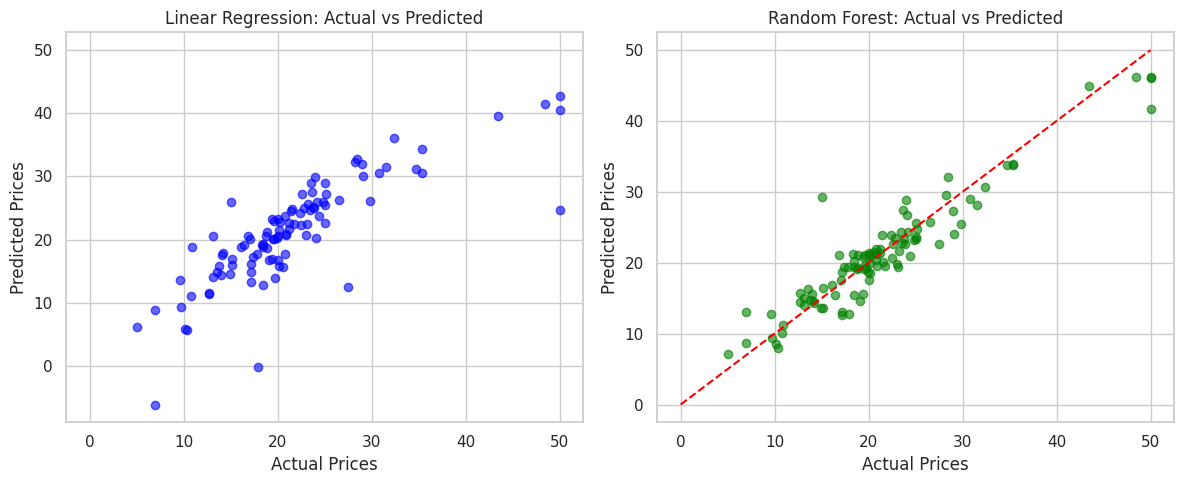

Conclusion:
Random Forest performs better than Linear Regression for this dataset.


In [ ]:
#  Install required library if needed
!pip install --quiet seaborn
#  Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_openml
# Load Boston Housing dataset from OpenML
boston = fetch_openml(name="Boston", version=1, as_frame=True)
data = boston.frame
#  Show first few rows
print("First 5 rows of the dataset:")
print(data.head())
#  Dataset info
print("\nData info:")
print(data.info())
# Check for missing values
print("\nMissing values:")
print(data.isnull().sum())
#  Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
#  Feature and target separation
X = data.drop("MEDV", axis=1)   # Features
y = data["MEDV"]                # Target
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Train Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
#  Train Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
# Evaluation function
def evaluate_model(name, y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"\n{name} Performance:")
    print(f"R2 Score: {r2:.4f}")
    print(f"RMSE: {rmse:.4f}")
#  Evaluate models
evaluate_model("Linear Regression", y_test, y_pred_lr)
evaluate_model("Random Forest", y_test, y_pred_rf)
#  Plot actual vs predicted
plt.figure(figsize=(12, 5))
# Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr, color='blue', alpha=0.6)
plt.plot([0, 50], [0, 50], color='red', linestyle='')
plt.title("Linear Regression: Actual vs Predicted")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
# Random Forest
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, color='green', alpha=0.6)
plt.plot([0, 50], [0, 50], color='red', linestyle='--')
plt.title("Random Forest: Actual vs Predicted")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.tight_layout()
plt.show()
# Conclusion
print("Conclusion:")
print("Random Forest performs better than Linear Regression for this dataset.")


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   

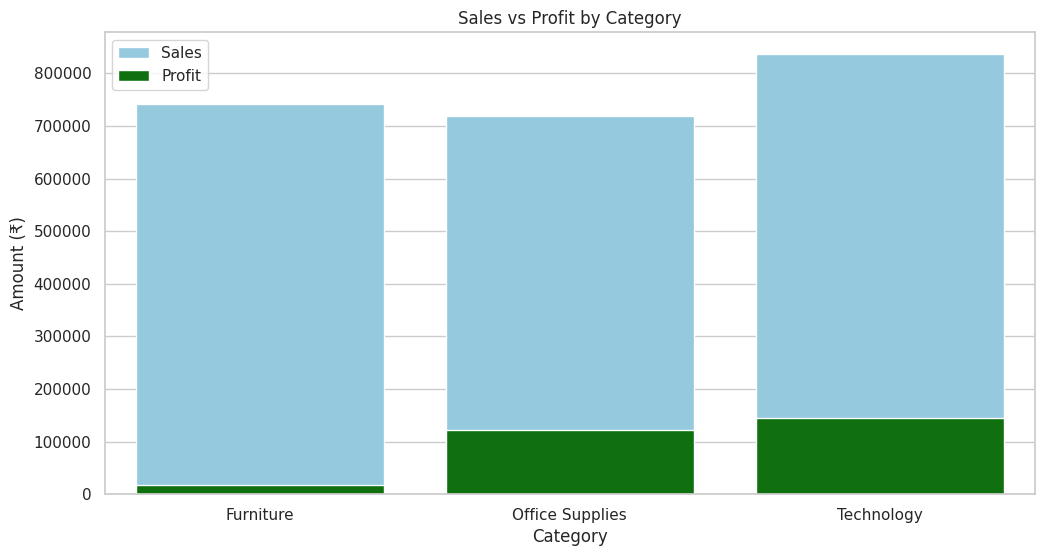

/tmp/ipython-input-16-274759350.py:50: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


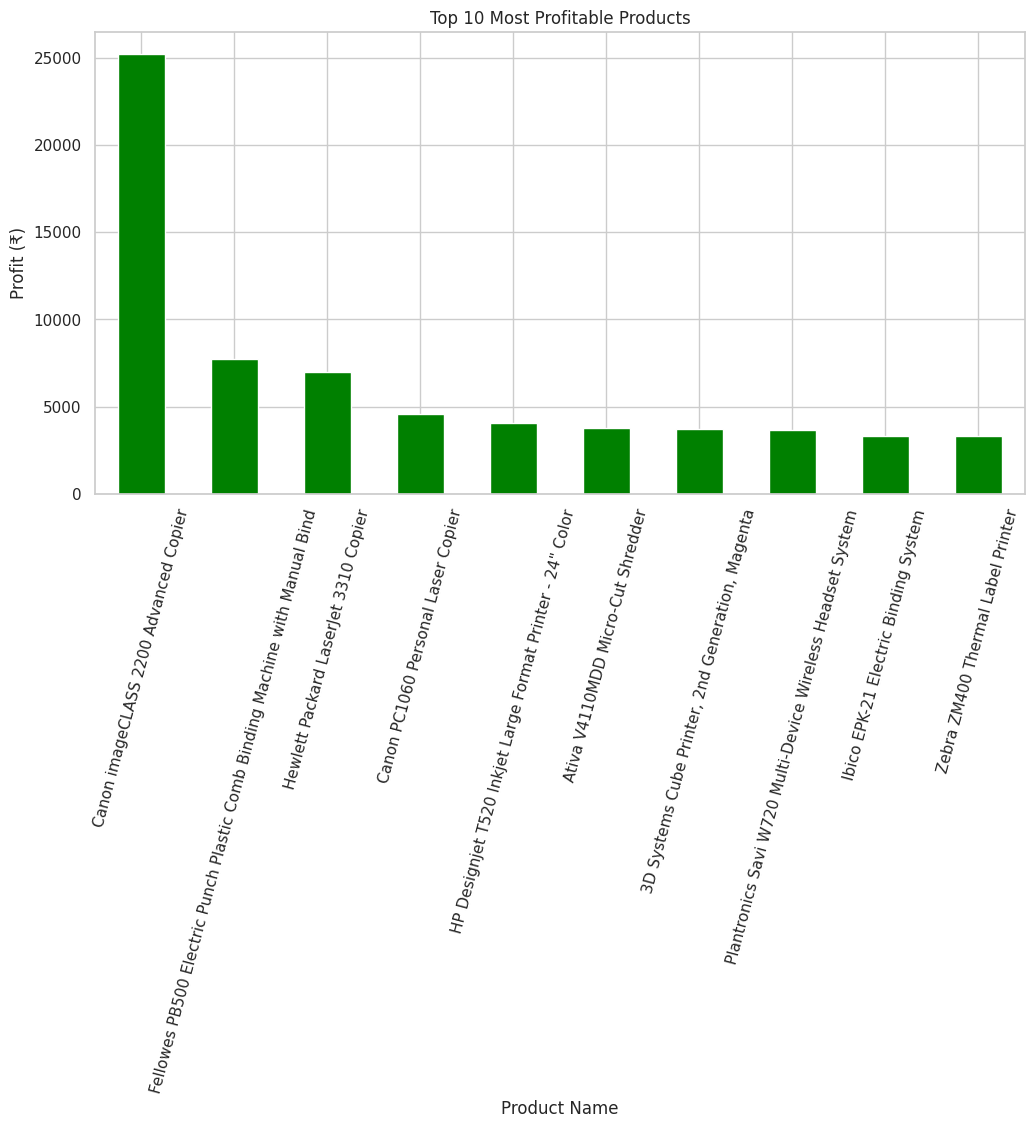

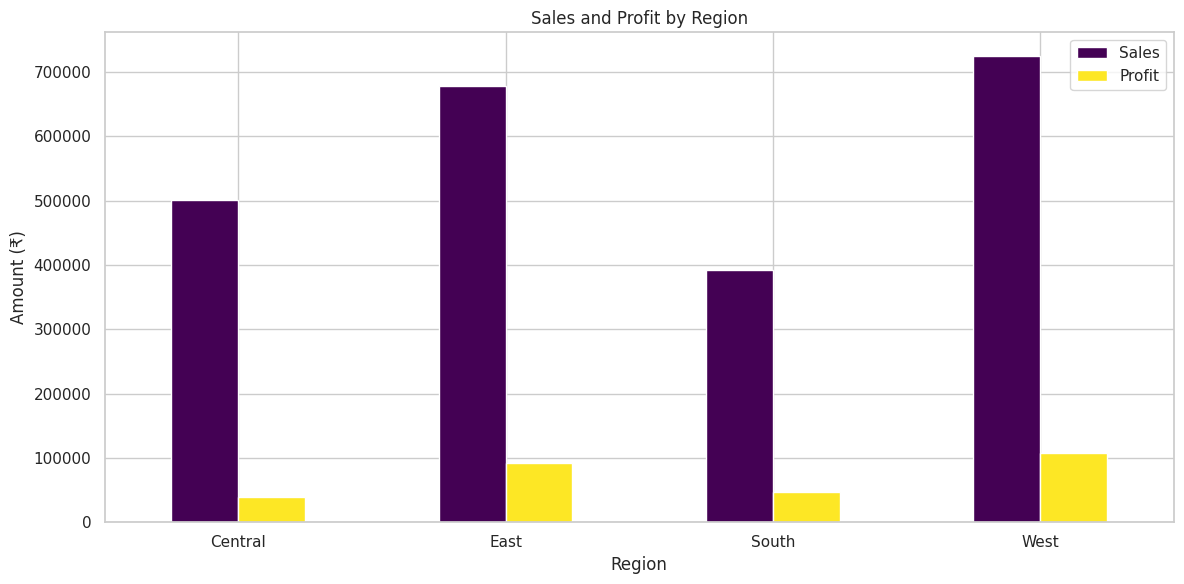

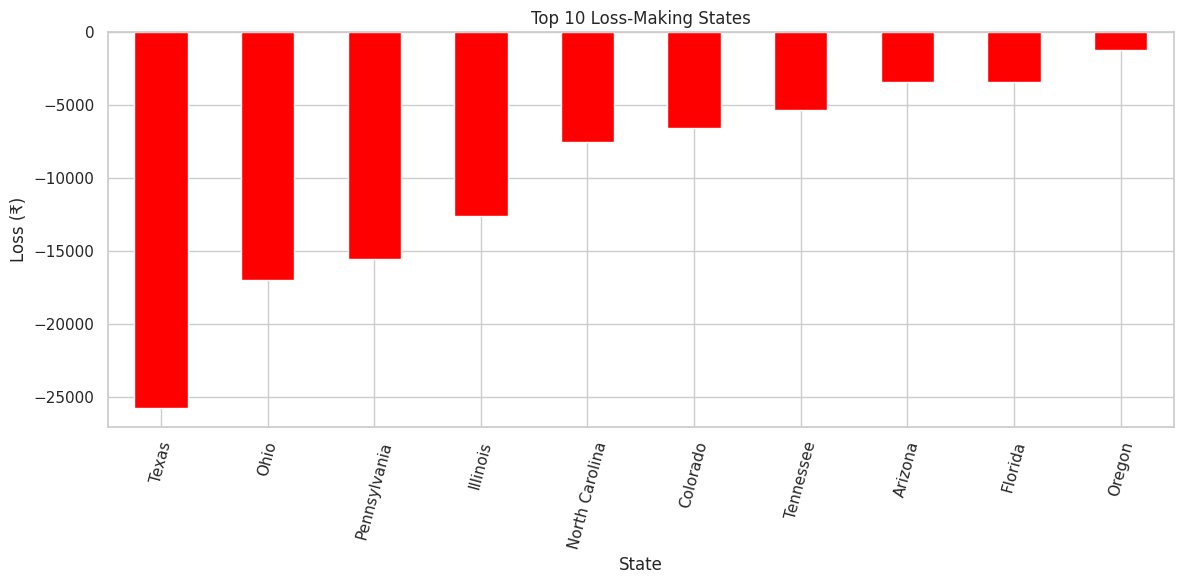

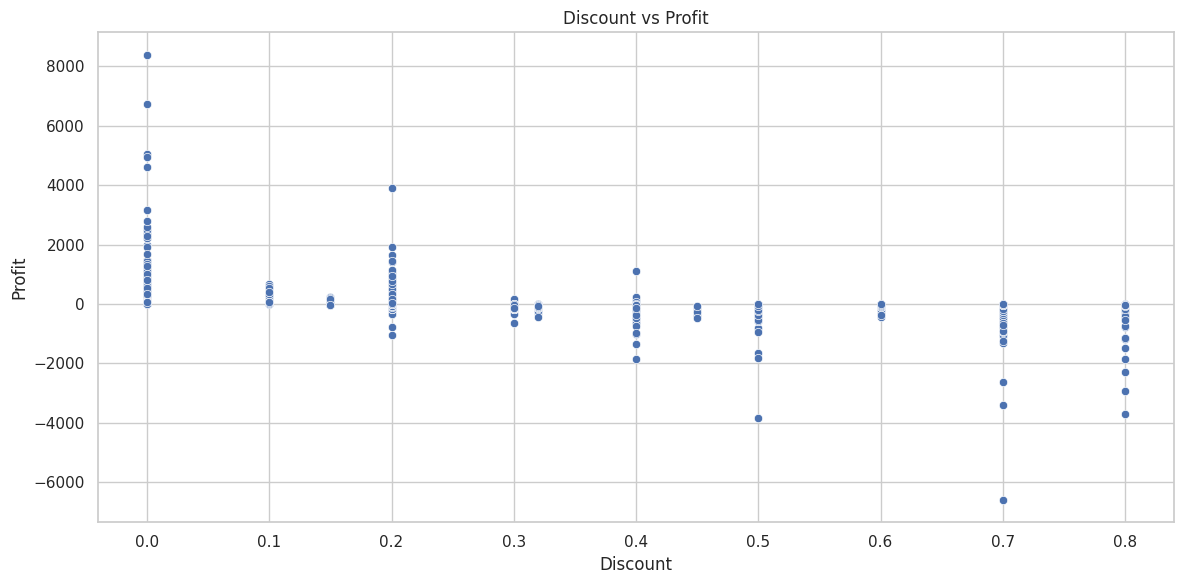

/tmp/ipython-input-16-274759350.py:82: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df['Sales'].resample('M').sum()


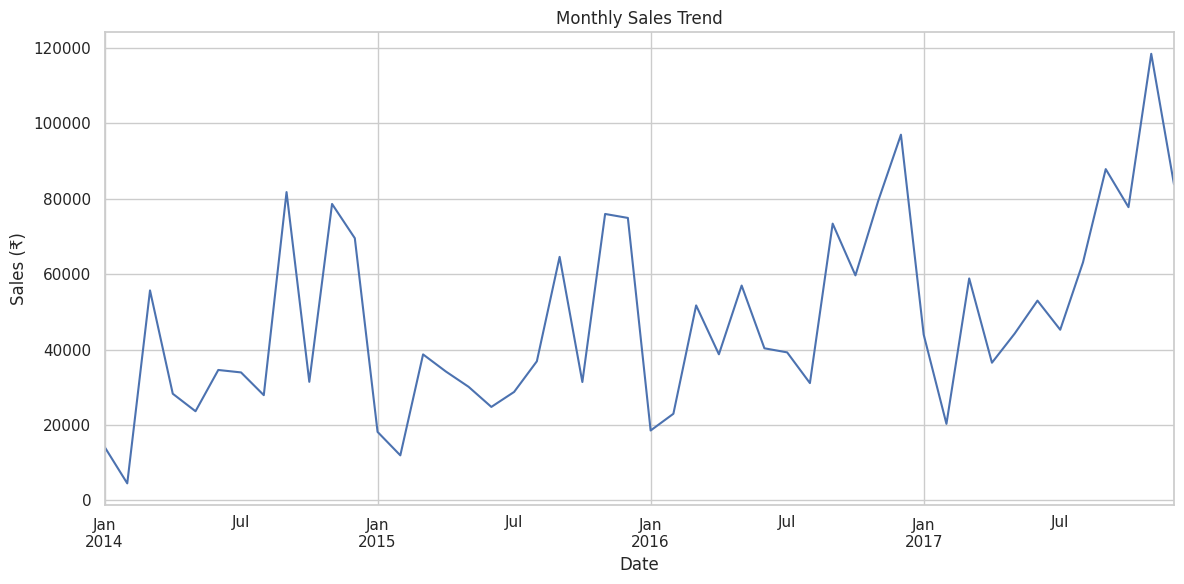

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Set plot style and figure size
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)
# Load the CSV file with encoding fix
file_path = "/content/drive/MyDrive/Sample - Superstore.csv"  # Update path as needed
df = pd.read_csv(file_path, encoding='ISO-8859-1')
# Show dataset info
print("Dataset Information:")
print(df.info())
# Show first few rows
print("\nFirst 5 rows of the dataset:")
print(df.head())
# Check for and remove missing values
print("\nMissing Values:")
print(df.isnull().sum())
df.dropna(inplace=True)
# Add a Profit Margin column
df['Profit Margin (%)'] = (df['Profit'] / df['Sales']) * 100
# Calculate KPIs
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
average_margin = df['Profit Margin (%)'].mean()
print(f"\nTotal Sales: ₹{total_sales:,.2f}")
print(f"Total Profit: ₹{total_profit:,.2f}")
print(f"Average Profit Margin: {average_margin:.2f}%")
# Top 5 profitable products
top_products = df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(5)
print("\nTop 5 Profitable Products:")
print(top_products)
# Category-wise Sales vs Profit bar plot
cat_data = df.groupby("Category")[["Sales", "Profit"]].sum().reset_index()
plt.figure()
sns.barplot(x="Category", y="Sales", data=cat_data, color='skyblue', label='Sales')
sns.barplot(x="Category", y="Profit", data=cat_data, color='green', label='Profit')
plt.title("Sales vs Profit by Category")
plt.ylabel("Amount (₹)")
plt.legend()
plt.show()
# Top 10 profitable products
top10 = df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(10)
plt.figure()
top10.plot(kind='bar', color='green')
plt.title("Top 10 Most Profitable Products")
plt.ylabel("Profit (₹)")
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()
# Region-wise Sales and Profit bar chart
region_data = df.groupby("Region")[["Sales", "Profit"]].sum()
region_data.plot(kind="bar", colormap="viridis")
plt.title("Sales and Profit by Region")
plt.ylabel("Amount (₹)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
# Top 10 loss-making states
loss_states = df.groupby("State")["Profit"].sum().sort_values().head(10)
plt.figure()
loss_states.plot(kind="bar", color="red")
plt.title("Top 10 Loss-Making States")
plt.ylabel("Loss (₹)")
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()
# Discount vs Profit scatter plot
plt.figure()
sns.scatterplot(x='Discount', y='Profit', data=df)
plt.title("Discount vs Profit")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.grid(True)
plt.tight_layout()
plt.show()
# Monthly Sales Trend (only if 'Order Date' exists)
if 'Order Date' in df.columns:
    df['Order Date'] = pd.to_datetime(df['Order Date'])
    df.set_index('Order Date', inplace=True)
    monthly_sales = df['Sales'].resample('M').sum()
    plt.figure()
    monthly_sales.plot()
    plt.title("Monthly Sales Trend")
    plt.ylabel("Sales (₹)")
    plt.xlabel("Date")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


Example 1:
[{'score': 0.17680318653583527, 'token': 8955, 'token_str': 'mumbai', 'sequence': 'the capital of india is mumbai.'}, {'score': 0.15313930809497833, 'token': 6768, 'token_str': 'delhi', 'sequence': 'the capital of india is delhi.'}, {'score': 0.139198437333107, 'token': 16920, 'token_str': 'pune', 'sequence': 'the capital of india is pune.'}, {'score': 0.06501801311969757, 'token': 13624, 'token_str': 'hyderabad', 'sequence': 'the capital of india is hyderabad.'}, {'score': 0.06434477865695953, 'token': 14022, 'token_str': 'bangalore', 'sequence': 'the capital of india is bangalore.'}]

Example 2:
[{'score': 0.12376557290554047, 'token': 2009, 'token_str': 'it', 'sequence': 'she likes to eat it with honey.'}, {'score': 0.10172177106142044, 'token': 2477, 'token_str': 'things', 'sequence': 'she likes to eat things with honey.'}, {'score': 0.0691319927573204, 'token': 16324, 'token_str': 'cookies', 'sequence': 'she likes to eat cookies with honey.'}, {'score': 0.05316175892949

/tmp/ipython-input-19-2120588037.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Score", y="Sentence", palette="Blues_d")


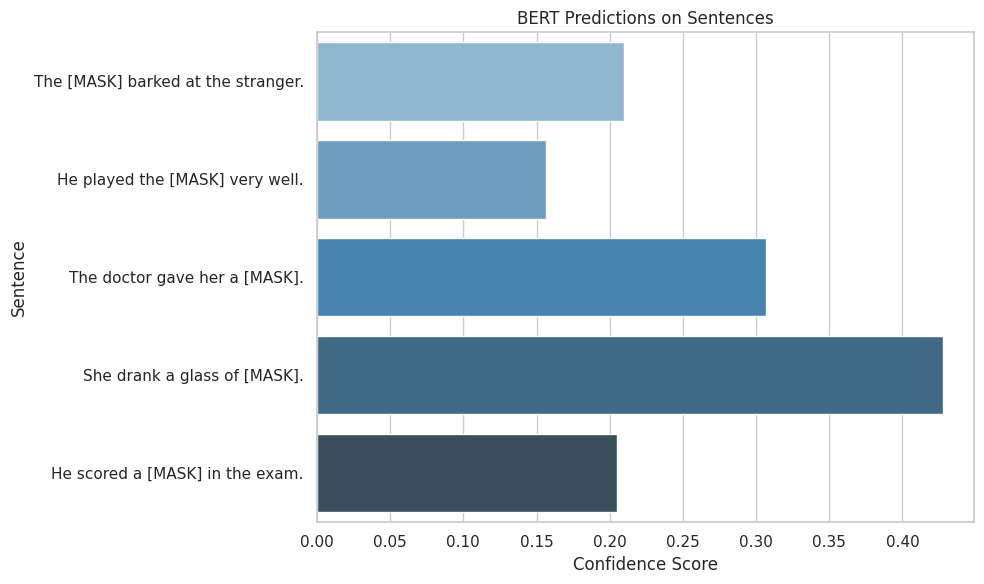


Top 3 Predictions:

Sentence: The [MASK] barked at the stranger.
  → man (score: 0.2097)
  → dog (score: 0.0966)
  → boy (score: 0.0553)

Sentence: He played the [MASK] very well.
  → game (score: 0.1563)
  → guitar (score: 0.1265)
  → piano (score: 0.1149)

Sentence: The doctor gave her a [MASK].
  → look (score: 0.3066)
  → smile (score: 0.1073)
  → hug (score: 0.0748)

Sentence: She drank a glass of [MASK].
  → water (score: 0.4275)
  → wine (score: 0.2799)
  → milk (score: 0.0748)

Sentence: He scored a [MASK] in the exam.
  → pass (score: 0.2052)
  → failing (score: 0.0311)
  → c (score: 0.0264)

Research Questions:
1. Can BERT guess the right word based on the sentence?
2. Does it work better for simple or complex sentences?
3. How well does BERT handle different topics?

Observations:
 BERT is good at guessing words in clear sentences.
 It gives sensible guesses even when the sentence is not clear.
 For domain-specific words, extra training (fine-tuning) might help.

Ethical Co

In [ ]:
#  Install required packages
!pip install transformers datasets matplotlib seaborn
# Import libraries
import torch
from transformers import BertTokenizer, BertForMaskedLM, pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
#Load BERT model and tokenizer
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForMaskedLM.from_pretrained(model_name)
# Create pipeline for masked word prediction
fill_mask = pipeline("fill-mask", model=model, tokenizer=tokenizer)
# Try simple examples
print("Example 1:")
print(fill_mask("The capital of India is [MASK]."))
print("\nExample 2:")
print(fill_mask("She likes to eat [MASK] with honey."))
# Test BERT with different sentences
sentences = [
    "The [MASK] barked at the stranger.",
    "He played the [MASK] very well.",
    "The doctor gave her a [MASK].",
    "She drank a glass of [MASK].",
    "He scored a [MASK] in the exam."
]
results = []
for s in sentences:
    result = fill_mask(s)[0]  # Best prediction
    results.append({
        "Sentence": s,
        "Prediction": result['token_str'],
        "Score": round(result['score'], 4)
    })
# Display results in a table
df = pd.DataFrame(results)
print("\nPredictions Table:\n")
print(df)
#  Visualize results
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="Score", y="Sentence", palette="Blues_d")
plt.xlabel("Confidence Score")
plt.title("BERT Predictions on Sentences")
plt.tight_layout()
plt.show()
#Show top 3 predictions for each sentence
print("\nTop 3 Predictions:")
for s in sentences:
    print(f"\nSentence: {s}")
    predictions = fill_mask(s)
    for p in predictions[:3]:
        print(f"  → {p['token_str']} (score: {round(p['score'], 4)})")
#  Research Questions
print("\nResearch Questions:")
print("1. Can BERT guess the right word based on the sentence?")
print("2. Does it work better for simple or complex sentences?")
print("3. How well does BERT handle different topics?")
# Observations
print("\nObservations:")
print(" BERT is good at guessing words in clear sentences.")
print(" It gives sensible guesses even when the sentence is not clear.")
print(" For domain-specific words, extra training (fine-tuning) might help.")
# Ethical Considerations
print("\nEthical Considerations:")
print(" BERT may show bias if trained on biased data.")
print("Always check model outputs before using them seriously.")
print("Use language models responsibly.")
